In [29]:
# !pip install tensorflow==1.14.0
# !pip install tensorflow-gpu==1.14.0

In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#to stop eager execution in tensorflow 2.0.0
tf.compat.v1.disable_eager_execution()

In [58]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [59]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [60]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Plotting the images

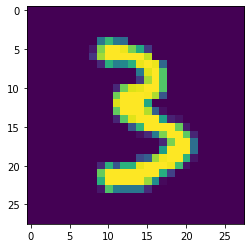

In [61]:
first_image = mnist.train.images[412]
first_image = np.array(first_image,dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [62]:
with tf.Session() as sess:
  print(tf.random_normal([784,256]).eval())


[[ 0.03106159 -0.14910685 -1.4611549  ...  0.39060292  0.13994977
  -0.8654958 ]
 [-0.24315223  0.39975733  0.01198822 ...  0.03148035 -0.79578364
  -1.6398605 ]
 [ 0.9579234   0.97463685 -0.42425677 ... -0.4823787  -0.4126565
  -2.1200545 ]
 ...
 [ 0.65535134  0.59346724  1.8897618  ... -1.2041941  -0.02354481
  -0.40280998]
 [-0.9780472   1.8813536  -0.05092945 ...  1.0540744  -0.679767
  -0.5233166 ]
 [ 0.5920644   0.11499977  0.23611896 ... -0.01316825  0.18116888
   0.68001795]]


In [63]:
n_input = 784             #784 = 28*28 representation of a image
n_hidden_1 = 256          #256 units in hidden layer 1
n_hidden_2 = 256          #256 units in hidden layer 2
n_classes = 10            #idenitfy between 0 to 9 the value

#h: hidden layers,out: output layer
weights = {
    "h1":tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    "h2":tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    "out":tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

#biases are 1D
biases = {
    "h1":tf.Variable(tf.random_normal([n_hidden_1])),
    "h2":tf.Variable(tf.random_normal([n_hidden_2])),
    "out":tf.Variable(tf.random_normal([n_classes]))
}

# Forward Propagation

In [64]:
#in hidden layer 1 and in hidden layer 2 we use relu as our activation function which means that max(a,0) means it'll show 0 if a value is negative
# and if +ve it'll return the value

In [65]:
def forward_propagation(x,weights,biases):
  in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1']) #net input in layer 1 x*weight_h1+bias
  out_layer1 = tf.nn.relu(in_layer1)                               #tf.neural_network.relu applying relu activation function
  
  in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
  out_layer2 = tf.nn.relu(in_layer2)

  output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
  return output

# Predictions with random weights

In [66]:
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])



In [67]:
pred = forward_propagation(x,weights,biases)
predictions = tf.argmax(pred,1)                     #index at which the prob is maximum it's b/w 0-9 and 1 is for axis which is row wise
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,true_labels)


### We do Back propagation to improve our model but in tensorflow we have to find cost function and reduce it and our optimizer will improve the accuracy

# Cost Function (cross entropy cost)

In [68]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))     #cross entropy cost and then mean of it

In [69]:
#optimizer change the weights and improve the accuracy
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = optimizer.minimize(cost)

In [70]:
sess = tf.Session()
sess.run(tf.global_variables_initializer()) #initializing our weights

### Before the optimizer

In [71]:
predictions = tf.argmax(pred,1)                     #index at which the prob is maximum it's b/w 0-9 and 1 is for axis which is row wise
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,true_labels)


In [72]:
predictions_eval,labels,correct_pred = sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
predictions_eval,labels,correct_pred

(array([8, 3, 8, ..., 3, 5, 8]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([False, False, False, ..., False,  True, False]))

In [73]:
correct_pred.sum()

1226

In [48]:
for i in range(25):
  c, _ = sess.run([cost,optimizer],feed_dict={x:mnist.train.images,y:mnist.train.labels})
  print(c)    #we run it multiple times and our cost will keep reducing

2279.9412
1466.9574
1036.7678
775.0749
566.9938
460.37354
428.44604
358.44043
268.7612
203.04701
172.01111
164.21219
166.74475
169.11108
163.26279
147.70178
128.18433
111.505035
100.49583
94.578636
91.9582
90.43446
88.637215
85.837166
82.016655


In [49]:
predictions = tf.argmax(pred,1)                     #index at which the prob is maximum it's b/w 0-9 and 1 is for axis which is row wise
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,true_labels)

In [50]:
predictions_eval,labels,correct_pred = sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
predictions_eval,labels,correct_pred

(array([7, 2, 1, ..., 4, 5, 6]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [51]:
correct_pred.sum()  #85% accuracy after optimizing by back propagation

8448

In [52]:
# How does this optimizer work
# by default the variables we create has a property which is trainable=true
# this optimizer finds all the variable which has trainable = true and find gradient with respect to all
# of them and changes the value for all of them to try and optimize the function on which we called minimize on 
# in our case we used cost function

In [53]:
#check how many variable are trainable
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>]

# Batch Gradient Descent

In [54]:
# we pass our data in small small batch sizes
batch_size = 100
for i in range(25):
  num_batches = int(mnist.train.num_examples/batch_size)
  batch_x,batch_y =  mnist.train.next_batch(batch_size)
  total_cost = 0
  for j in range(num_batches):
      
      c, _ = sess.run([cost,optimizer],feed_dict={x:batch_x,y:batch_y})
      total_cost += c
  print(total_cost)


269.0397525522074
125.4699737482228
416.7855190689614
573.4671566324439
305.2419113491054
469.43720862830247
439.6421555364138
423.96765580011527
497.8737296468971
448.44221215807374
293.33255974686097
857.6757249819118
430.47489830931136
533.4591222814066
463.7637494418077
407.9089450710744
430.5755017850108
362.11670417519457
527.9248631181151
547.7163931392341
381.34276638609396
250.22577713691584
290.7775284193747
323.533155288313
245.78756951831505


In [55]:
predictions = tf.argmax(pred,1)
correct_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,correct_labels)
predictions,correct_predictions = sess.run([predictions,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_predictions.sum()

8146

# 82% of Accuracy while using Batch Gradient Descent but although it's a good practice to send data in batches to aim for better accuracy but again it differ from dataset to dataset that which approach should we consider but in a ideal condition Batch Gradient Descent will work ~Nikhil Mishra